In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

## Fitting with censored data

In [2]:
# data for censored fitting problem.
n = 20  # dimension of x's
M = 25  # number of non-censored data points
K = 100 # total number of points
c_true=np.array([-0.43,-1.7,0.13,0.29,-1.1,1.2,1.2,-0.038,0.33,0.17,-0.19,0.73,-0.59,2.2,-0.14,0.11,1.1,0.059,-0.096,-0.83])

X = np.array([[0.29,-1.6,4.3e-05,0.62,-1.2,0.13,-0.33,0.47,-0.46,0.64,-1,0.49,-0.54,1.1,-0.9,0.84,-0.65,-0.98,1.1,-0.072,1.4,-0.78,-0.89,-2.4,-1.4,0.083,-0.57,-0.072,-0.026,1.1,2.1,-0.51,0.72,-0.089,-0.37,0.53,-0.027,-0.51,-0.61,0.76,-1.4,0.76,0.2,-0.42,0.44,-1.6,-0.85,-1,0.49,0.72,-0.15,1.3,0.66,-0.26,1.7,-0.25,0.26,0.56,-0.8,-0.073,-0.3,0.18,-0.67,-1.4,-0.76,0.74,-0.33,-0.5,0.045,0.53,0.81,-0.8,0.25,0.31,-2.1,0.56,0.54,0.93,1.4,0.81,-0.4,-1.3,0.14,-0.023,-1.3,-1.8,-1.7,-1.2,0.8,-0.25,-0.3,-0.53,0.87,0.72,0.87,0.45,0.91,0.37,-2.3,-0.6]
,[-1.3,0.26,-0.32,0.8,-2.2,0.66,-0.84,-0.9,0.37,-0.6,-0.18,-0.005,-1.3,-0.25,0.14,-0.72,-1.1,-0.69,2.4,0.28,1.3,-0.77,0.14,-0.22,0.61,0.77,-1.5,-2.4,-1.1,1.6,0.08,0.25,0.039,-1,-0.83,1,0.17,0.23,0.69,-0.69,-0.69,-1.7,0.26,-0.61,0.57,0.43,0.35,-0.66,-0.87,1.6,0.32,0.67,-1.6,-1.4,0.12,-1.3,-0.19,0.48,0.31,-0.99,-0.17,0.23,-0.9,-0.3,-0.6,0.81,-2,0.21,2.4,2.1,-1,-0.0083,-1.4,1.4,-0.66,-2,0.68,1.2,0.42,1.9,0.91,1.2,-0.016,0.11,-0.3,-1.5,0.48,0.3,0.88,-0.15,1.2,0.54,-0.8,-0.28,2.4,0.89,1.5,-0.55,1.4,-0.99]
,[0.71,-1.1,1.1,0.94,0.99,-1.2,0.5,0.036,0.73,0.55,1.5,-0.28,1.1,-1.5,-0.14,-0.72,-0.048,1.3,0.23,1.4,-0.91,-0.11,-0.24,0.058,-1.3,2.2,-0.05,-0.69,0.75,1.4,-0.94,0.37,1.5,0.94,0.29,-1.1,0.88,-0.6,0.02,0.68,0.33,1.5,2.1,0.72,-0.69,-0.74,0.11,0.56,0.08,-2.1,1.3,-0.28,-3,-1.3,0.65,1.2,-0.079,-0.68,1.1,-0.75,0.18,-1.2,-0.15,-0.57,0.81,-0.14,1.6,0.75,-0.31,0.35,1.3,0.63,0.97,0.33,1.5,-0.76,-0.59,-0.25,0.069,0.4,-0.14,1.5,-0.94,0.81,-2.6,0.82,-0.45,-0.73,-0.22,-1.2,1,0.68,-0.75,-1.4,0.11,1.1,-1.1,0.58,1.4,1.2]
,[1.6,1.4,-1.9,-0.99,-0.52,-0.46,1.5,-0.63,2.1,-1.1,-0.038,1.3,-0.71,0.0097,-1.2,-0.2,0.38,-0.91,-0.27,0.18,-2.3,-0.98,-0.075,-0.42,-0.66,0.33,0.55,-1.4,0.5,-0.76,0.64,0.18,-1.7,-1.1,-1.8,0.36,0.18,0.021,1.1,-1.1,-1,-1.6,-2.3,0.34,0.83,0.56,-1.1,-1.2,-0.52,-0.74,-2.2,-0.023,0.54,-0.89,2.1,1.5,0.7,0.28,-1.7,-0.031,0.42,0.7,0.95,-0.12,0.07,-0.1,0.23,-0.95,0.19,0.23,0.015,0.15,1.6,0.48,-0.33,-2.4,-0.26,-0.71,0.29,-0.86,1.3,1.8,-1.5,-1,0.78,-0.23,0.39,-1.1,0.3,-0.022,2.1,0.54,-0.75,0.46,0.026,-0.1,1.8,-2,-0.45,2.4]
,[-0.69,-0.81,0.43,0.21,0.33,-0.26,-0.55,0.54,-1.4,0.086,1.2,1.9,-0.011,0.071,1.2,-0.02,-0.33,-0.41,0.7,-0.54,1.8,-0.96,-0.36,-0.2,-0.15,0.86,0.083,0.33,-0.52,0.44,1.7,-0.037,-1,-0.71,-1.6,-0.037,0.76,0.42,-1.3,0.9,0.29,1.1,0.34,0.88,-2.2,-1.4,-0.68,-0.78,-1.4,0.18,1.3,-0.91,-1,0.59,-0.34,0.24,-0.8,-1.3,-1.1,0.99,1.7,0.43,1.6,-0.39,-1.8,-0.8,0.65,0.61,0.95,1.3,0.22,2.6,-1.4,0.4,2.7,-0.66,1.5,-0.59,0.47,2.4,0.32,0.63,0.36,-1,0.6,-1.6,0.053,-1.4,-0.52,0.62,-0.66,-0.51,-0.31,1.1,0.97,1.5,0.15,0.52,-0.63,2.3]
,[0.86,0.53,0.9,0.24,0.23,-1.2,-0.85,0.55,-1,-2,-0.7,-0.52,-0.00082,0.32,-0.015,0.28,-0.5,-0.51,-0.49,1.6,0.39,-2.4,-2.1,-1.5,0.25,0.68,1.6,0.6,-0.56,0.91,0.59,-1.6,-0.76,-1.2,2,-1.2,0.51,1.2,0.48,-2.1,1.1,-1.1,0.29,0.28,1.1,0.46,-0.28,0.27,-0.38,0.53,-0.38,-1,0.91,1.8,0.73,-1.4,-0.8,-0.72,-0.19,-0.6,2,1.5,0.43,-0.84,1.8,0.49,-1.1,1.8,-0.53,-0.013,1.7,-1.3,-1.5,-0.073,-1.6,-0.11,1,-0.26,1.8,-0.84,-0.48,0.083,0.48,0.28,0.94,-0.32,-0.49,-0.59,-0.16,1.9,-1.1,-1.3,-1.5,-1,-0.0053,0.17,-0.28,1.6,1,2.3]
,[1.3,0.22,0.73,-1,0.021,-1.3,-0.25,-0.2,1,-0.49,0.0075,0.1,-0.25,0.5,0.54,1.1,-0.036,1.6,1.9,0.83,0.02,-0.84,-0.14,-1.1,-0.077,0.55,-0.33,0.15,-0.75,-1.1,0.79,0.34,2.2,1.1,-0.072,-0.28,0.13,0.77,-1.6,0.28,0.24,0.39,0.66,-0.15,-0.0016,0.63,0.65,1.5,-0.46,-0.55,0.0025,0.37,1.6,1.3,0.29,0.66,-0.0076,-0.66,0.46,1.5,0.7,-0.51,-0.56,-1.7,0.65,1.2,0.2,0.089,-1.1,-1.3,-2.1,1,-0.075,1.3,-0.54,0.3,0.3,1.2,0.26,0.28,0.076,2.1,0.32,0.29,-1,-0.8,0.24,0.52,-0.098,0.082,0.95,-0.61,0.83,-2.8,1.4,0.8,1.7,0.73,-0.49,-0.27]
,[-1.6,-0.92,0.58,-0.74,-1,0.93,0.66,-2.1,-0.39,0.46,-0.78,-0.81,0.4,1.3,-0.72,0.62,-0.17,0.081,1.1,0.23,-0.41,0.26,1.4,-0.82,1.7,1,0.8,-0.1,0.93,0.2,0.11,-0.13,0.43,-0.68,2.6,-0.16,0.28,-2.6,-1.4,-0.73,0.16,0.97,-0.58,-0.09,-1.6,0.38,-1.2,-1.1,-0.29,0.3,0.88,0.9,-0.98,-0.49,-0.85,-2.6,-0.73,0.2,-0.92,-0.81,-1.4,-0.0067,0.18,-0.45,-1.5,1.3,1.7,2.6,-1.6,-0.56,0.11,0.78,0.081,0.98,0.55,-0.58,-0.82,-1.5,1.5,0.82,-0.11,1.3,-1.9,-0.25,-0.068,0.69,0.72,-1.5,1,1.6,-0.4,-0.57,-0.61,1,1.8,-1.7,0.67,0.56,-0.4,0.5]
,[-1.4,-2.2,0.04,1.1,-0.95,0.011,-0.85,0.13,-1.4,-0.32,0.59,0.68,-0.26,-0.55,-0.66,-1.8,-0.96,-1.1,-1.2,0.67,-1.5,-0.18,0.65,0.37,1.6,1.3,-0.78,-2.6,-0.25,0.76,-0.16,0.49,-0.44,-1.7,-0.24,-1.1,-0.98,0.29,0.29,-0.77,0.41,0.82,0.89,0.29,-1.2,-1,-0.6,0.63,-0.3,-1.2,0.58,1.3,1,-2.2,-2.5,-0.53,-1.5,-1.8,-0.65,0.65,0.36,-0.53,-0.77,-1.5,-0.38,-0.28,0.73,-0.68,1.2,0.76,-1.1,-0.83,-0.84,1.7,1.5,-3.1,-0.49,-0.39,0.32,1.2,1.4,-1.8,0.68,-0.22,0.082,-0.042,0.15,-0.087,0.43,-0.38,-0.38,0.086,0.96,0.077,0.89,0.17,-0.35,-0.81,1.4,-0.12]
,[0.57,-0.059,0.68,-0.13,-0.37,-0.65,-1.2,1.6,0.32,1.2,-0.25,-2.4,-1.7,0.26,0.31,0.7,1.3,-1.1,-0.67,-0.51,0.22,-0.17,-0.38,-0.59,0.63,0.044,-1.3,0.028,-0.15,-1.3,0.87,0.6,0.03,0.81,0.17,-2,-0.94,0.83,-0.14,0.15,1.2,0.037,0.17,1.2,0.21,-0.35,-0.48,-0.8,-1.6,-0.19,-1.6,-0.13,0.16,0.24,-2.4,3.2,0.87,-1.4,0.62,-1.3,-0.57,0.72,-0.94,-0.096,0.21,0.22,0.79,2.8,0.49,-0.91,-1.6,-0.59,-0.56,-0.41,-0.46,1.6,0.87,0.28,0.8,-0.064,0.71,-0.014,0.23,0.9,-1.8,0.32,0.13,-0.013,-0.026,-1.3,0.48,0.69,2,-1.9,1.1,-0.48,-0.26,-0.54,0.28,-0.0019]
,[-0.4,-1,0.57,0.39,-1.2,0.81,-0.12,1,1.6,-0.63,0.48,0.99,-1,-0.013,0.11,0.81,0.44,1.7,1.3,0.86,-1.4,-0.12,-0.66,1.5,0.092,-0.31,0.67,-0.88,-1.3,-0.95,-0.19,-0.086,-0.32,1.4,0.92,-0.91,-0.013,-0.0081,-1.1,-0.34,1.4,-0.93,0.85,0.81,0.22,0.44,0.98,-0.31,1.1,-0.3,-1.5,0.61,-0.59,-0.74,-0.35,0.44,-0.27,0.2,-1.3,-0.87,-1,1.1,-1.4,0.91,-0.77,0.63,0.6,-0.017,1.6,1.4,0.64,0.066,-0.028,0.57,-0.5,-0.41,0.36,0.83,0.58,0.65,0.37,2.5,1.2,-0.64,-1.8,0.51,-1,-0.35,-0.38,-0.72,0.44,2.1,0.29,-0.61,0.4,-0.73,-0.64,1.3,1.9,-0.43]
,[0.69,0.61,-0.26,0.088,-1.1,0.23,-0.065,-1.6,0.71,-2.3,0.67,0.22,0.24,-0.58,1.8,0.64,1.3,1.9,0.39,0.27,-0.84,0.17,0.25,0.14,-0.81,0.23,-1.4,-0.27,0.31,0.78,0.075,0.33,0.98,0.67,-0.18,-0.0056,0.35,0.86,-0.29,0.97,-1,-0.11,0.96,-1.4,-1,-1.6,1.8,-0.6,1.3,0.96,0.57,2,1.6,-1.8,-0.61,-1.1,-1.6,1.5,1,-0.47,0.7,0.5,-1.9,2.4,-0.11,-0.55,-0.058,0.27,-0.45,0.25,-0.4,-0.012,-1.2,0.74,1.2,1.4,-0.08,-0.98,1.8,-1.8,-0.6,-0.67,0.13,-0.18,-0.66,-1,1.3,0.99,-0.24,-0.56,0.38,-0.0029,-0.39,1.2,0.19,-2.1,-0.91,-0.48,-0.8,-0.19]
,[0.82,0.51,-0.38,-0.64,1.5,-0.99,0.49,-0.079,2,-1.2,-0.078,0.26,-1.3,2.1,-0.28,1.3,-0.5,1.6,0.39,0.62,-0.21,-0.5,-0.38,-1.9,-0.46,1,-1.3,-0.33,2.7,-0.0063,-0.53,-0.34,0.018,0.14,-0.52,-1.7,-0.89,0.77,-0.58,-0.11,0.21,-0.8,1.3,0.12,-0.45,-0.7,1.4,1.3,-0.13,-0.53,-0.91,2.3,-0.52,0.45,-0.41,0.89,-0.39,0.37,0.86,0.22,0.48,2.8,-0.065,0.52,0.34,0.23,-1.1,-0.91,1,0.12,-0.4,-0.077,0.73,0.22,0.041,-1.4,0.75,-0.1,-0.94,0.06,-0.85,0.26,0.18,0.72,1.4,0.099,1.2,0.64,-1.2,0.62,1.1,-0.09,0.58,-0.58,-0.69,-1.8,0.72,-1.8,-0.56,0.99]
,[0.71,1.7,-0.3,-0.56,0.056,1.3,-0.6,-0.68,0.5,1.1,0.89,1.2,-0.35,-0.26,2.2,0.33,-1.1,-1.3,-1.7,-1,0.76,-0.71,-0.53,-0.45,-1.4,1.2,-0.61,-1.2,0.29,0.52,-0.69,-0.32,0.82,-0.86,1.4,1.3,0.81,1.3,-0.9,1,0.59,-1.7,-0.064,-0.22,1.4,-1.1,0.91,0.86,-0.74,-0.9,-1.6,-0.37,1.2,0.58,-1.4,-0.28,-0.14,-0.44,-0.64,1.9,-0.19,-0.16,0.67,0.41,1,0.36,2.1,-2,2,0.38,0.084,-1.6,0.06,1.3,0.75,0.9,-1.8,0.13,-0.92,-0.76,0.66,-0.37,-0.61,0.3,2.1,-0.12,-2.6,2.9,0.76,-1.3,0.86,-0.25,-1.1,-0.26,0.011,-0.052,-0.0073,-0.93,1.7,0.47]
,[1.3,0.59,-1.5,0.44,-1.2,0.29,-0.15,-1,1.9,-0.11,2.3,-0.27,-0.94,-1.4,1.5,-0.67,0.81,-0.21,0.23,1.5,0.38,0.51,0.055,-0.65,-0.37,-0.54,-1.5,0.58,-1.4,1.4,-0.27,-0.38,0.7,-0.75,-0.87,-0.6,0.11,1.2,0.25,-0.48,-0.26,-0.9,1.3,0.57,-0.46,1,0.33,-2.1,0.21,-0.89,-0.36,2.2,1.6,0.86,0.23,1,-2.3,-0.049,0.66,0.11,-0.38,0.43,0.21,1.1,-1.4,0.52,-1.4,-0.32,0.6,-0.07,-0.44,1.7,0.15,0.63,1.2,0.54,1.2,0.063,0.38,-1.7,1.5,1.3,-1,1.5,0.17,0.69,-2.1,-1.2,1.2,-0.12,-1.2,-0.87,0.061,0.0047,-1.1,-0.086,-2.8,0.92,-0.64,-1.4]
,[0.67,-0.64,-0.23,-0.95,-0.041,1.5,-0.43,-1.2,-0.34,0.38,0.52,-0.13,-1.2,1.8,-1.9,-0.15,0.041,-0.2,0.69,0.43,-1.3,-0.42,1.3,0.1,-0.47,0.91,0.56,0.24,0.25,0.48,-1.2,-0.95,-0.23,1.2,0.81,-2.1,2.7,0.96,-1.5,0.069,2.5,0.59,0.23,-0.3,0.033,1.7,0.07,-0.36,-0.4,0.28,-0.4,-0.16,-2.1,-0.27,0.21,-0.36,-1.4,0.078,1.3,-0.41,-0.89,-2,-0.0081,0.43,-1,-0.62,0.46,0.59,0.018,-0.58,-0.56,-0.47,1.6,-1.1,0.3,-0.47,-0.061,0.37,0.91,1.1,-0.81,-0.65,-0.3,-0.044,-1.7,1.9,0.39,0.16,-1,-1.1,0.4,0.42,0.012,-0.039,1.9,-1.2,-0.15,0.041,-1.4,0.27]
,[1.2,0.38,0.12,0.78,-1.1,1.1,-0.079,0.29,-1.1,0.94,-0.012,-1.3,-1,0.33,-1.7,-2.4,-0.76,0.31,-0.64,-1.9,1.5,0.23,-2.5,-0.22,1.8,-0.17,-0.28,-0.35,-1.4,-0.79,0.25,0.23,-0.11,1.2,-0.51,0.11,0.41,-1.7,0.31,0.4,0.86,0.55,-1.4,1.1,0.8,0.71,-1.5,0.55,0.065,-0.75,-1.2,-0.7,2.9,-0.42,-0.72,1.3,-1.8,2,0.31,0.51,-1.8,-0.55,0.02,1.3,-0.64,1.3,0.39,0.83,-1.6,0.47,0.88,0.095,-0.78,-0.45,1.1,2.4,-0.39,-0.1,0.15,1.5,-1.3,0.062,1.5,-0.03,0.28,0.33,-0.86,0.79,1.7,-2.8,-0.58,-0.13,-0.17,-0.51,-0.17,-0.75,0.58,0.41,-0.76,2.6]
,[-1.2,-1,0.31,0.57,-1.3,-0.68,1.5,-0.43,-0.21,-2.1,0.91,-1.7,-0.4,-1.1,-0.57,0.47,-0.089,-0.57,-1,0.47,0.033,-0.96,0.58,-0.28,0.75,-0.34,-1.3,0.89,0.15,0.75,0.1,1.2,0.13,-0.61,0.74,1.5,-1.3,-0.99,-2,1.1,-0.85,-0.42,-0.15,-0.18,0.9,-0.75,-0.42,-1.6,-1.8,1.6,-1.1,0.56,1.4,-0.21,0.76,1,1.1,-0.073,0.86,-1.2,-1.6,-1.9,-0.56,-0.19,0.17,0.97,2.1,-1.7,1.2,1.3,-0.81,0.29,1.6,-0.73,0.77,2,0.61,-0.7,-0.2,0.24,1.7,-0.74,1.8,-0.38,0.39,-0.095,-1.2,-0.58,-0.49,0.25,-0.98,0.54,-0.69,-1.2,-0.73,0.95,0.75,0.6,0.16,-0.054]
,[-0.02,-0.02,1.4,-0.82,-0.26,-1.3,-0.61,0.056,1.2,-0.64,0.056,-0.7,0.17,0.62,-0.19,0.12,-2,-0.98,-0.19,1.3,1.9,-0.15,-1,-0.73,0.065,0.54,-0.89,1.6,-1.7,-0.17,-0.041,-0.58,-0.8,0.81,0.85,0.053,0.38,0.69,0.53,0.62,0.81,0.062,-0.5,-1.5,0.14,0.23,-0.021,-0.21,1.7,0.57,0.29,-0.05,1.1,-0.17,-1.6,0.21,-0.14,0.94,0.13,-0.096,-1.2,-0.11,1.9,0.13,1.3,-2.4,-0.32,-1.9,0.68,1.6,-0.26,0.92,1.1,0.35,-1.3,0.8,0.64,-0.39,1.5,-1.1,0.1,-0.18,-1.3,-0.55,-0.099,0.031,2.6,0.53,0.17,-0.86,0.12,0.88,-0.99,0.71,-0.99,-0.18,-0.17,1.9,0.38,0.47]
,[-0.16,-0.048,-0.35,-0.27,0.95,-0.073,-1.3,-0.37,-1.1,-0.7,-1.1,0.28,-0.12,1.3,0.0089,-0.59,1.1,-0.45,-1.1,0.64,-1.2,0.74,0.94,-0.065,-0.29,0.93,-0.99,-1.1,0.72,-0.82,-2.2,-0.5,-0.24,0.22,-0.83,0.16,0.5,-0.97,0.34,-0.29,0.7,0.46,-1.7,1.4,-1.6,-0.22,0.23,-0.43,0.33,0.32,-1.9,1.2,-0.77,0.22,-1.1,-0.3,1.1,-0.08,0.017,0.45,-0.42,-1.3,-0.22,-0.66,1.9,-1.1,1.5,-0.44,-0.78,-0.7,0.49,0.51,-0.17,-0.51,-0.51,0.031,1,0.016,-0.62,2.4,-0.8,1.1,0.39,0.93,0.18,-0.61,-0.9,1.7,0.35,1.1,0.068,-1.3,-0.05,0.73,0.89,-0.066,-0.58,0.71,0.18,-2.1]
             ])

y = X.T.dot(c_true) + 0.1*(np.sqrt(n))*np.array([-0.8,-0.46,0.19,0.89,-1.6,-0.32,-0.7,-0.74,0.37,1.4,0.46,0.66,1.1,0.98,\
               -1.3,-0.023,0.13,2.4,0.9,0.076,0.36,-2.1,-2.3,-0.37,1.3,0.56,-0.18,-0.036,\
               1.9,1.3,-0.36,-0.33,0.083,0.43,-1.2,-2.7,-0.54,2.2,-0.61,1.4,1.2,0.74,-0.12,\
               -0.031,-1,-1,0.63,0.87,2.1,-0.59,0.59,1.5,2.1,-0.75,-1.5,-0.21,0.49,-0.32,0.82,\
               -1.4,1.1,0.98,0.49,1.3,0.59,0.45,-1.4,-0.92,-1.4,-1.5,0.097,-0.23,-0.32,0.63,0.039,\
               -0.016,0.45,-0.52,-1.1,-0.048,-0.5,1.6,-0.24,-0.96,-0.15,1.7,1.6,-1.1,0.097,0.25,2.2,\
               0.31,2,-0.12,-0.27,1.4,-0.074,-0.36,-0.78,-0.25])

# Reorder measurements, then censor
sort_ind = np.argsort(y)
y_sorted = np.sort(y)
X_sorted = X[:,sort_ind]
D = (y_sorted[M-1]+y_sorted[M])/2
y = y_sorted[:M];
y.shape

(25,)

In [5]:
y_c = cp.Variable(K-M)
c = cp.Variable(n)
J_censor = cp.Minimize(cp.sum_squares(y - c@X_sorted[:,:M]) + cp.sum_squares(y_c - c@X_sorted[:,M:]))
constraints = [y_c >= D]
censor_prob = cp.Problem(J_censor, constraints)
censor_prob.solve()

2.906876415923428

In [6]:
censor_error = cp.norm(c_true - c)/cp.norm(c_true)
print("status :",censor_prob.status)
print("optimal c:",c.value)
print("relative errors :", censor_error.value)

status : optimal
optimal c: [-0.3269437  -1.77504259  0.33810052  0.24061117 -0.92119447  1.33051771
  1.35453779 -0.11834819  0.33629335  0.28196704 -0.12448658  1.06476889
 -0.42509169  2.20414089 -0.36418589 -0.17599681  1.05178224 -0.09111486
 -0.16377562 -0.76100482]
relative errors : 0.17521758003435312


In [7]:
J_ls = cp.Minimize(cp.sum_squares(y - X_sorted[:,:M].T@c))
ls_prob = cp.Problem(J_ls)
ls_prob.solve()
ls_error = cp.norm(c_true - c)/cp.norm(c_true)
print("status :", ls_prob.status)
print("optimal cls", c.value)
print("relative errors :", ls_error.value)

status : optimal
optimal cls [-0.39470935 -1.85406214  0.28999202  0.31126861 -0.74317327  1.33406211
  1.72343901 -0.45873722  0.40950501  0.08732271 -0.12576086  1.57175233
 -0.49709542  2.35399322 -0.57281198 -0.3828666   1.02743028 -0.1564808
 -0.27717574 -0.5114151 ]
relative errors : 0.36584596178950674


## Minimax rational fit to the exponential 

In [32]:
k = 201
ii = np.arange(1,k+1)
t =  -3 +6 * (ii-1)/(k-1)
y = np.exp(t)
t_pow = np.array([np.repeat(1,len(t)),t,t**2])
t_pow.shape

(3, 201)

In [42]:
a = cp.Variable(3)
b = cp.Variable(3)
gamma = cp.Parameter(1,pos = True)
constraints = [b[0] == 1, b@t_pow >= 0,
               cp.abs(a@t_pow - cp.multiply(y,b@t_pow)) <= gamma*(b@t_pow)]
obj = cp.Minimize(gamma)
itera = 0
l,u = 0,np.exp(3)
tol = 1e-3
opt_a,opt_b = None,None
while u-l >= 1e-3:
    m = (u+l)/2
    gamma.value = [m]
    prob = cp.Problem(obj, constraints=constraints)
    prob.solve()
    if prob.status == "optimal":
        u = m
        itera += 1
        print(f"iter {itera} : optimal a :{a.value}, optimal b:{b.value}")
        opt_a, opt_b = a.value, b.value
    else:
        l = m
print("optimal gamma",gamma.value)

iter 1 : optimal a :[1.01765913 1.69026875 0.61523656], optimal b:[ 1.          0.00308715 -0.03212216]
iter 2 : optimal a :[1.02518811 1.57583276 0.52372819], optimal b:[ 1.         -0.01380358 -0.04323567]
iter 3 : optimal a :[1.0324384  1.38861557 0.41407417], optimal b:[ 1.         -0.03615429 -0.05048451]
iter 4 : optimal a :[1.02872949 1.25847037 0.3600263 ], optimal b:[ 1.         -0.07413268 -0.04412755]
iter 5 : optimal a :[0.96672867 1.11546721 0.33819654], optimal b:[ 1.         -0.15852344 -0.0178767 ]
iter 6 : optimal a :[0.96009137 0.83437439 0.22315627], optimal b:[ 1.         -0.30558722  0.02117395]
iter 7 : optimal a :[0.98559571 0.68237971 0.15499835], optimal b:[ 1.         -0.37902951  0.03974269]
iter 8 : optimal a :[1.00068496 0.63581571 0.12911809], optimal b:[ 1.         -0.40069833  0.04493305]
iter 9 : optimal a :[1.00661699 0.61059193 0.11582734], optimal b:[ 1.         -0.41462338  0.04858885]
iter 10 : optimal a :[1.00851023 0.61079797 0.11460907], optimal

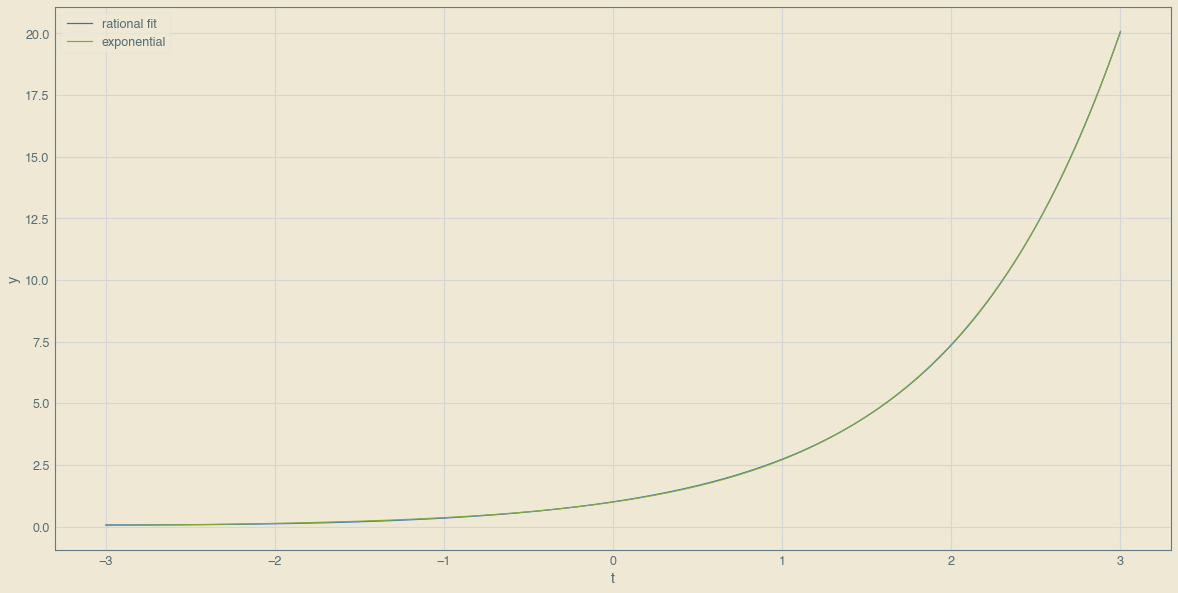

In [49]:
f = (opt_a@t_pow)/(opt_b@t_pow)
plt.figure(figsize = (20,10))
plt.plot(t, f, label = "rational fit")
plt.plot(t, y, label = "exponential")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()

/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0, 0.5, 'f(t) - y')

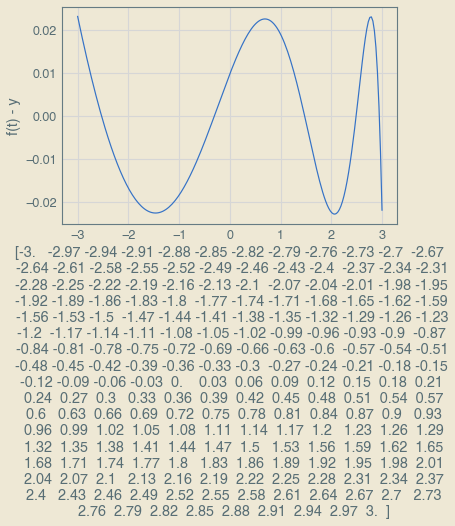

In [52]:
plt.plot(t, f - y)
plt.xlabel(t)
plt.ylabel("f(t) - y")

## Maximum likelihood estimation of an increasing nonnegative signal